Midterm Assignemt
- Lecture : Risk and Portfolio Management
- Name : Doheun Kiel 길도흔
- student ID : 2021313121

In [928]:
# dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import qpsolvers

### Data resturcturing

Monthly returns of the 30 largest stocks in the US.
File name: crsp.csv (uploaded on iCapmus) Sample period: 2000.01 - 2022.12 (monthly data)
Stocks: 30 largest stocks in the US as of 2022.12.31. Columns
- permno: Unique stock id
- ret: Monthly return
- prc: Price
- shrout: Shares outstanding
- Assume that the risk-free rate is 0.

In [929]:
wd = "./crsp-2.csv" # set working directory
df = pd.read_csv(wd)
df["date"] = pd.to_datetime(df["date"]) # Convert "date" column into datetime data type
df

,Unnamed: 0,date,permno,ret,prc,shrout
0,2873115,2000-01-31,10104,-0.108477,49.953125,2847344.0
1,2883897,2000-02-29,10104,0.486393,74.250000,2838409.0
2,2891757,2000-03-31,10104,0.051347,78.062500,2838409.0
3,2897954,2000-04-28,10104,0.024019,79.937500,2838409.0
4,2911756,2000-05-31,10104,-0.100860,71.875000,2807572.0
...,...,...,...,...,...,...
8275,4874507,2022-08-31,92655,-0.042427,519.330017,935383.0
8276,4891888,2022-09-30,92655,-0.024339,505.040009,935383.0
8277,4897944,2022-10-31,92655,0.099220,555.150024,935383.0
8278,4908957,2022-11-30,92655,-0.013312,547.760010,934349.0


In [930]:
class StockData:
  def __init__(self, data):
    self.data = data
    
  def get_stock_id(self):
    stock_id_list = self.data["permno"].unique()

    return stock_id_list

  def get_num(self):
    stock_id_list = self.get_stock_id()

    return len(stock_id_list)
  
  def get_panel(self):
    '''
    Restructing the data to make panel data
    row : timeseries
    column : stocks' return
    '''
    panel_df = pd.pivot_table(self.data, values="ret", index="date", columns="permno")
    
    return panel_df

In [931]:
stock = StockData(data=df)
num_of_assets = stock.get_num()
stock_data = stock.get_panel()
stock_data

permno,10104,10107,11308,11850,13856,14541,14593,17778,18163,20482,...,62092,65875,66181,76076,83443,84398,84788,86580,87055,92655
date,,,,,,,,,,,,,,,,,,,,,
2000-01-31,-0.108477,-0.161670,-0.013948,0.035687,-0.031915,-0.034632,0.009119,-0.087344,-0.074661,-0.098589,...,0.154167,0.012345,-0.176364,0.022170,-0.100546,-0.049362,-0.151888,-0.210386,0.072603,-0.002353
2000-02-29,0.486393,-0.086845,-0.153428,-0.092105,-0.058608,-0.099103,0.104819,-0.140625,-0.130489,0.013436,...,-0.097473,-0.209889,0.020971,0.207192,-0.125152,-0.015667,0.066796,0.726813,0.014049,-0.035377
2000-03-31,0.051347,0.188811,-0.031208,0.034855,0.089805,0.237657,0.184842,0.300000,-0.357041,0.066288,...,0.304000,0.249042,0.116368,0.169740,0.263889,0.096832,-0.027223,0.320068,0.059194,0.166846
2000-04-28,0.024019,-0.343529,0.006658,-0.003208,0.051971,-0.079108,-0.086516,0.036713,0.063186,0.097762,...,-0.049080,-0.024376,-0.124031,-0.103274,0.052816,-0.035121,-0.176306,0.054929,0.028537,0.118449
2000-05-31,-0.100860,-0.103047,0.129630,0.078069,0.114140,0.093539,-0.322922,-0.011804,0.112971,0.058537,...,-0.041935,-0.107595,-0.136062,-0.178724,-0.015722,-0.015723,-0.124575,0.280505,-0.409249,0.118088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,-0.047405,-0.066432,-0.038336,-0.004746,-0.015375,-0.026255,-0.031137,-0.067284,-0.006983,-0.056872,...,-0.088718,-0.094826,-0.035289,-0.014327,-0.065868,-0.040802,-0.060615,-0.168970,-0.035470,-0.042427
2022-09-30,-0.176399,-0.109267,-0.085075,-0.086620,-0.045626,-0.091041,-0.120977,-0.035219,-0.084747,-0.057379,...,-0.069372,-0.091844,-0.043270,-0.105546,-0.049074,-0.092119,-0.108622,-0.195508,-0.095441,-0.024339
2022-10-31,0.283609,-0.003306,0.068368,0.269156,0.112214,0.259135,0.109551,0.094915,0.073927,0.027387,...,0.013368,0.001383,0.073168,0.145250,0.105123,0.081276,-0.093451,0.111871,0.063798,0.099220


## Efficient Frontier of risky assets

$\textbf{Problem}$
\
Our problem is minimize portfolio varinace subject to equality constranints

$$
\underset{\mathbf w}{min} \ \frac{1}{2} \mathbf w ' \Sigma \mathbf w
$$
$$
\newline subject \ to
\quad \mathbf w ' \mathbf e = 1
\quad and \quad
\ \mathbf w ' \mathbf\mu = \mu_p
$$

where $ \mathbf w $ is 30x1 weight vectors and $ \mathbf e = [1 \ 1 \ 1 \ ... \ 1]' $ which is 30X1 column vector


This can be rewritten as
$$
\underset{ \mathbf w}{min} \ \frac{1}{2} \mathbf{w} ' \Sigma \mathbf w
$$
$$
\newline subject \ to
\quad A \mathbf{w} = \mathbf b
$$
$$
where \quad A = [ \mathbf{e} \ \mathbf{\mu} ]'\quad and \quad \mathbf b = [1 \ \mu_p]'
$$

and then constructing lagrangian
$$
\mathbf L =  \frac{1}{2} \mathbf w ' \Sigma \mathbf w - (A\mathbf w - \mathbf b)'\mathbf\lambda
$$

where $ \mathbf \lambda = [ \lambda_1 \ \lambda_2 ]' $ is 2x1 multiplier vector

$\textbf{Solution}$
$$
A\textbf w_p =  \textbf b
$$
$$
\textbf w_p =  \Sigma^{-1}A'\textbf{$\lambda$} \quad (1)
$$
$$
A\Sigma^{-1}A'\textbf{$\lambda$} = Q \lambda = \textbf b \quad (2)
$$

$$
\textbf w_p =  \Sigma^{-1}A'Q^{-1}\textbf b
$$

where $Q = A\Sigma^{-1}A'$ and $Q$ is symmetric matrix and positive definite which is nonsingular.

In [932]:
class Portfolio(StockData):
  def __init__(self, data):
    super().__init__(data)
    self.panel = self.get_panel()

  def get_mu_vector(self):
    '''
    Vectors of each stock return
    '''
    mu = self.panel.mean(axis=0)

    return mu
  
  def get_cov_matrix(self):
    '''
    N X N matrix
    variance-covariance matrix
    '''
    Sigma = self.panel.cov()

    return Sigma
  
  def get_e(self):
    '''
    N X 1 Vector
    e = [ 1 1 ... 1 ]^T
    '''
    mu = self.get_mu_vector()
    e = np.ones_like(mu)

    return e
  
  def get_A(self):
    '''
    2 X N Vector
    A = [ e mue ]^T
    '''
    mu = self.get_mu_vector()
    e = self.get_e()
    A = np.column_stack((e, mu)).transpose()

    return A
  
  def get_Q(self):
    '''
    N X N Matrix
    Q = A @ Sigma^{-1} @ A^T
    '''
    A = self.get_A()
    Sigma = self.get_cov_matrix()
    Q = A @ np.linalg.inv(Sigma) @ A.transpose()

    return Q
  
  def get_b(self, target_return):
    '''
    2 X 1 Vector
    b = [ 1 mue_tgt ]^T
    '''
    b = np.array([[1],[target_return]])

    return b
  
  def get_w_gmv(self):
    '''
    weight of global minimum variance portfolio
    N X 1 Weight Vector
    w_gmv = 1/q_11 * Sigma^{-1} @ e
    '''
    Q = self.get_Q()
    Sigma = self.get_cov_matrix()
    e = self.get_e()
    w_gmv = 1/Q[0][0] * np.linalg.inv(Sigma) @ e

    return w_gmv
  
  def get_w_d(self):
    '''
    weight of well-diversified portfolio
    N X 1 Weight Vector
    w_d = 1/q_12 * Sigma^{-1} @ mu
    '''
    Q = self.get_Q()
    Sigma = self.get_cov_matrix()
    mu = self.get_mu_vector()
    w_d = 1/Q[0][1] * np.linalg.inv(Sigma) @ mu
    
    return w_d
  
  def get_pf_variance(self, target_return):
    '''
    variance of portfolio
    1 X 1 Scalar
    pf_variance = b^T @ Sigma^{-1} @ b
    '''
    b = self.get_b(target_return)
    Q = self.get_Q()
  
    variance =  (b.transpose() @ np.linalg.inv(Q) @ b).item()

    return variance
  
  def get_pf_weight(self, target_return):
    '''
    weight of optimal portfolio
    N X 1 Vector
    w_pf = Sigma^{-1} @ A^T @ Q^{-1} @ b
    '''
    b = self.get_b(target_return)
    Sigma = self.get_cov_matrix()
    A = self.get_A()
    Q = self.get_Q()
    
    w_pf = np.linalg.inv(Sigma) @ A.transpose() @ np.linalg.inv(Q) @ b

    return w_pf

### 1. Estimate the expected returns and the covariance matrix using the sample mean and same covariance over the period from 2000.01 to 2020.12.

In [933]:
pf = Portfolio(df)
mu = pf.get_mu_vector() # mu vector
Sigma = pf.get_cov_matrix() # covariance matrix

In [934]:
mu

permno
10104    0.008822
10107    0.010172
11308    0.006405
11850    0.008267
13856    0.009024
14541    0.010541
14593    0.025575
17778    0.009089
18163    0.007305
20482    0.010488
21936    0.006506
22111    0.008099
22752    0.007469
24205    0.014246
43449    0.010501
47896    0.009680
49680    0.014385
50876    0.011163
55976    0.005660
59408    0.009619
62092    0.016400
65875    0.004501
66181    0.009859
76076    0.005505
83443    0.009110
84398    0.006013
84788    0.019765
86580    0.033178
87055    0.011960
92655    0.019202
dtype: float64

In [935]:
Sigma

permno,10104,10107,11308,11850,13856,14541,14593,17778,18163,20482,...,62092,65875,66181,76076,83443,84398,84788,86580,87055,92655
permno,,,,,,,,,,,,,,,,,,,,,
10104,0.008572,0.002934,0.000119,0.001368,0.000706,0.001470,0.004079,0.000848,0.000065,0.001018,...,0.001999,0.000993,0.002321,0.004598,0.000881,0.002298,0.004389,0.006888,0.002320,0.001195
10107,0.002934,0.006708,0.000947,0.001064,0.000814,0.001660,0.004527,0.000923,-0.000011,0.001063,...,0.002364,0.002131,0.002165,0.003660,0.000927,0.002243,0.004630,0.005773,0.001756,0.000755
11308,0.000119,0.000947,0.002547,0.001054,0.001360,0.001162,0.000347,0.000851,0.001170,0.000758,...,0.000995,0.000970,0.000823,0.000977,0.000906,0.000956,0.000744,0.000356,0.000578,0.000615
11850,0.001368,0.001064,0.001054,0.004045,0.000727,0.003566,0.001271,0.001107,0.000559,0.000529,...,0.000921,0.001300,0.000915,0.001176,0.001099,0.001426,0.000926,0.002342,0.000273,0.000898
13856,0.000706,0.000814,0.001360,0.000727,0.002070,0.000877,0.000403,0.000955,0.000995,0.000962,...,0.001155,0.001153,0.001034,0.000870,0.000975,0.000935,0.000551,0.000733,0.000858,0.000890
14541,0.001470,0.001660,0.001162,0.003566,0.000877,0.004718,0.002034,0.001561,0.000426,0.000705,...,0.001389,0.001427,0.001530,0.001788,0.001536,0.001815,0.001511,0.003351,0.000796,0.001236
14593,0.004079,0.004527,0.000347,0.001271,0.000403,0.002034,0.012953,0.000656,-0.000207,0.000328,...,0.002247,0.001021,0.002539,0.004169,0.000698,0.002769,0.006143,0.009694,0.003018,0.001393
17778,0.000848,0.000923,0.000851,0.001107,0.000955,0.001561,0.000656,0.002804,0.000466,0.000887,...,0.001301,0.000840,0.001238,0.001226,0.002756,0.001229,0.000769,0.001757,0.001002,0.001212
18163,0.000065,-0.000011,0.001170,0.000559,0.000995,0.000426,-0.000207,0.000466,0.002635,0.000855,...,0.000549,0.000319,0.000523,0.000564,0.000548,0.000617,0.000726,-0.000593,0.000478,0.000701


### 2. Draw the efficient frontier using the stocks (no risk-free asset).

$Two \ Fund \ Separation \ Theorem$
\
\
Using equation (1),
$$
\mathbf w_p =  \lambda_1 \Sigma^{-1}\mathbf e + \lambda_2 \Sigma^{-1}\mathbf\mu
$$
$$
\mathbf w_p =  q_{11} \lambda_1 ( \frac{1}{q_{11}} \Sigma^{-1}\mathbf e ) + q_{12} \lambda_2 ( \frac{1}{q_{12}} \Sigma^{-1}\mathbf\mu )
$$
$$\mathbf w_p =  q_{11} \lambda_1 w_{gmv} + q_{12} \lambda_2 w_d$$




\
According to the Two Fund Theorem,
optimal portfolio weights $w_p$ can be rewritten  as a linear combination of weight of global minimum variance portfolio $w_{gmv}$ and weight of well-diversified portfolio $w_d$ since $ q_{11} \lambda_1 + q_{12} \lambda_2 = 1$ in equation (2),
$$
w_p = \alpha w_{gmv} + (1-\alpha) w_d
$$
$$
where \quad 0 \leq \alpha \leq 1
$$

In [936]:
mu_list_1 = []
sigma_list_1 = []
w_gmv = pf.get_w_gmv()
w_d = pf.get_w_d()

for i in np.arange(0, 1.0001, 0.0001):
    opt_weight = i * w_gmv + (1-i) * w_d
    mu_list_1.append(opt_weight.T @ mu)
    sigma_list_1.append(np.sqrt(opt_weight.T @ Sigma @ opt_weight))

Text(0, 0.5, '$\\mu$')

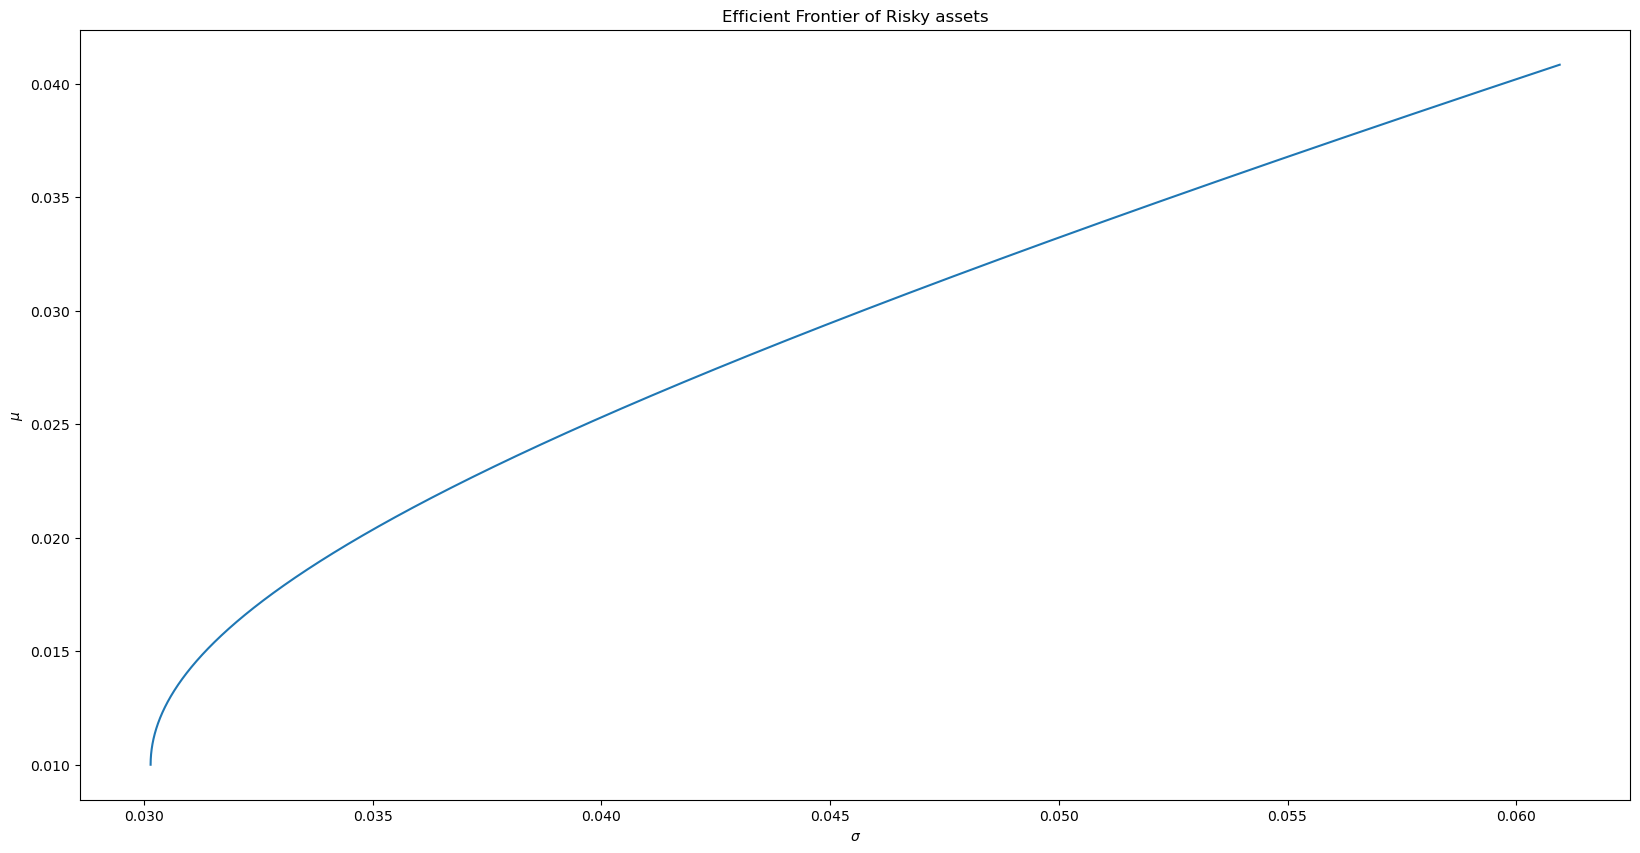

In [937]:
plt.figure(figsize=(20,10))
plt.title("Efficient Frontier of Risky assets")
plt.plot(sigma_list_1, mu_list_1)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')

### 3. Draw the efficient frontier subject to the short-sale constraint:

$$
0 \leq \mathbf w
$$

In [938]:
e = pf.get_e()
w_min = qpsolvers.solve_qp(Sigma.values, 0 *e , A=e, b=np.array([1]), lb=0 * e, solver="daqp")
w_max = qpsolvers.solve_qp(1e-10 * Sigma.values, -mu.values, A=e, b=np.array([1]), lb=0 * e, solver="daqp")

In [939]:
mu_min = w_min @ mu
mu_max = w_max @ mu
print(mu_min)
print(mu_max)

0.00971156342366097
0.03318569748860286


In [940]:
mu_list_2 = []
sigma_list_2 = []

for mu_tgt in np.arange(mu_min, mu_max, 0.0002):
    w = qpsolvers.solve_qp(Sigma.values, 0 * e, -mu.values, np.array([-mu_tgt]), e, np.array([1]), 0 * e, solver="daqp")

    if w is None:
        continue

    mu_list_2.append(w.T @ mu.values)
    sigma_list_2.append(np.sqrt(w.T @ Sigma @ w))

Text(0, 0.5, '$\\mu$')

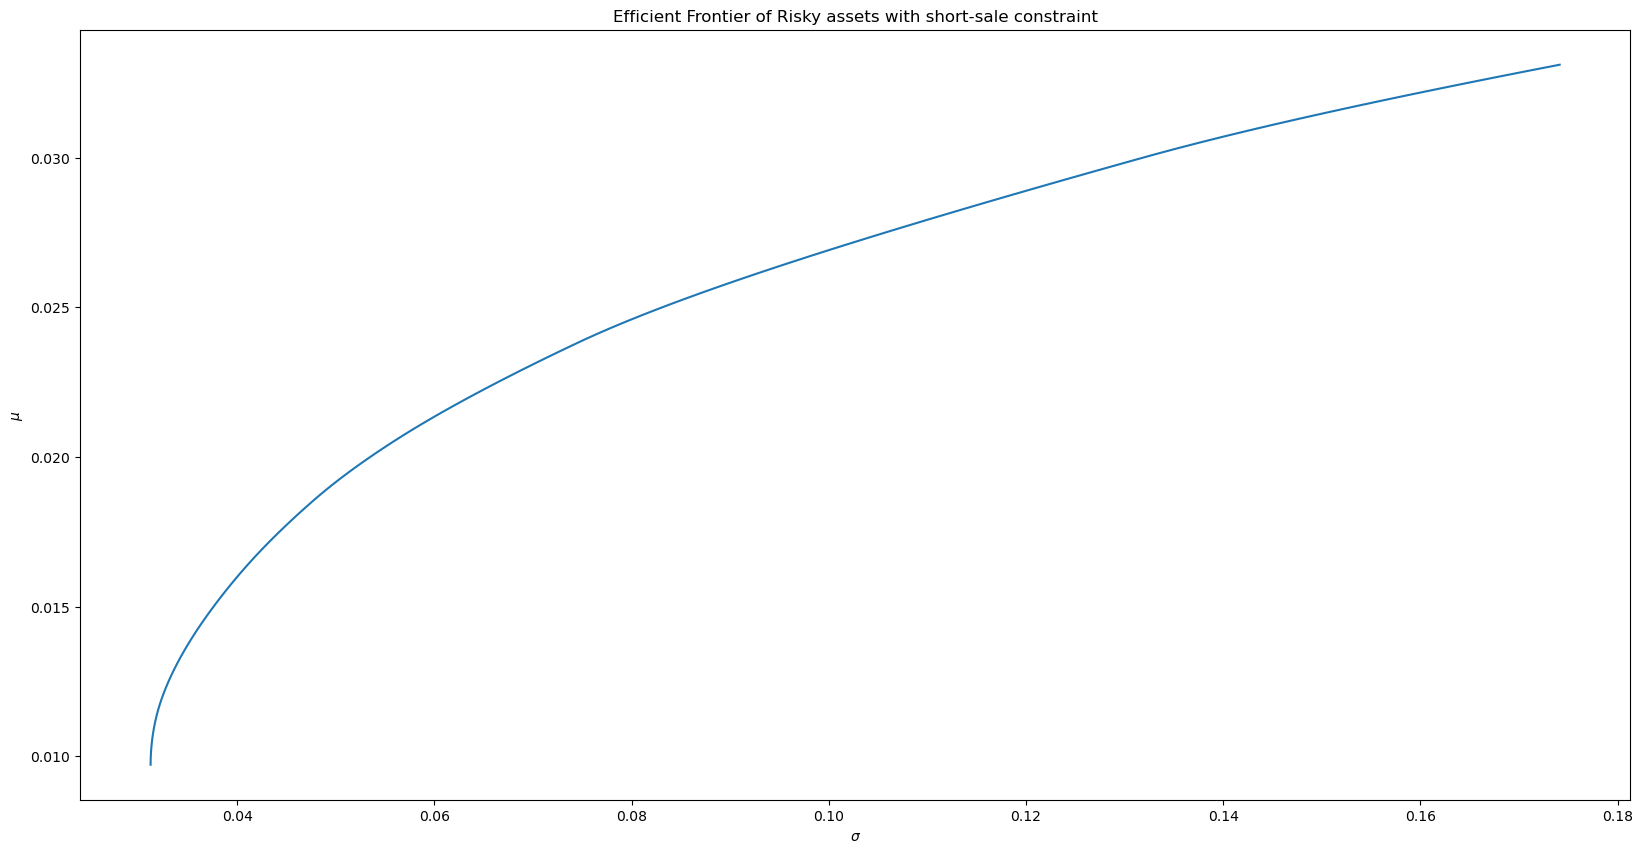

In [941]:
plt.figure(figsize=(20,10))
plt.title("Efficient Frontier of Risky assets with short-sale constraint")
plt.plot(sigma_list_2, mu_list_2)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')

### 4. Draw the efficient frontier subject to:

$$
0 \leq \mathbf w \leq 0.1
$$

In [942]:
w_min = qpsolvers.solve_qp(Sigma.values, 0 *e , A=e, b=np.array([1]), lb=0 * e, ub=0.1 * e, solver="daqp")
w_max = qpsolvers.solve_qp(1e-10 * Sigma.values, -mu.values, A=e, b=np.array([1]), lb=0 * e, ub=0.1 * e, solver="daqp")

In [943]:
mu_min = w_min @ mu
mu_max = w_max @ mu
print(mu_min)
print(mu_max)

0.009769341208722243
0.018206388832930017


In [944]:
mu_list_3 = []
sigma_list_3 = []

for mu_tgt in np.arange(mu_min, mu_max, 0.0002):
    w = qpsolvers.solve_qp(Sigma.values, 0 * e, -mu.values, np.array([-mu_tgt]), e, np.array([1]), 0 * e, 0.1 * e, solver="daqp")

    if w is None:
        continue

    mu_list_3.append(w.T @ mu.values)
    sigma_list_3.append(np.sqrt(w.T @ Sigma @ w))

Text(0, 0.5, '$\\mu$')

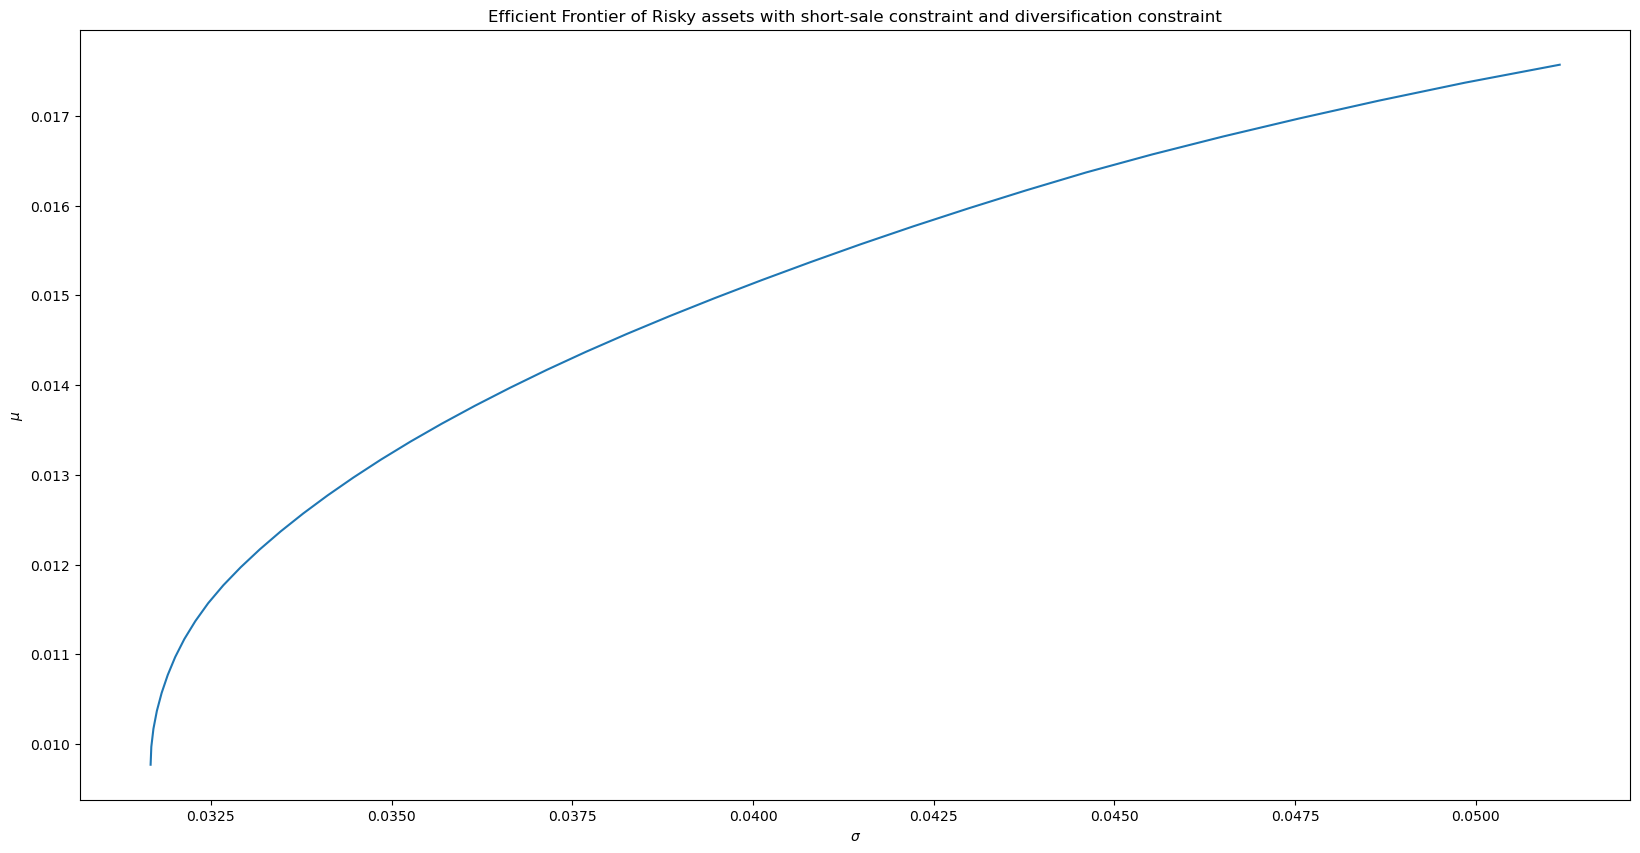

In [945]:
plt.figure(figsize=(20,10))
plt.title("Efficient Frontier of Risky assets with short-sale constraint and diversification constraint")
plt.plot(sigma_list_3, mu_list_3)
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')

### 5. Compare the three efficient frontiers and observe how the frontier changes with more constraints.

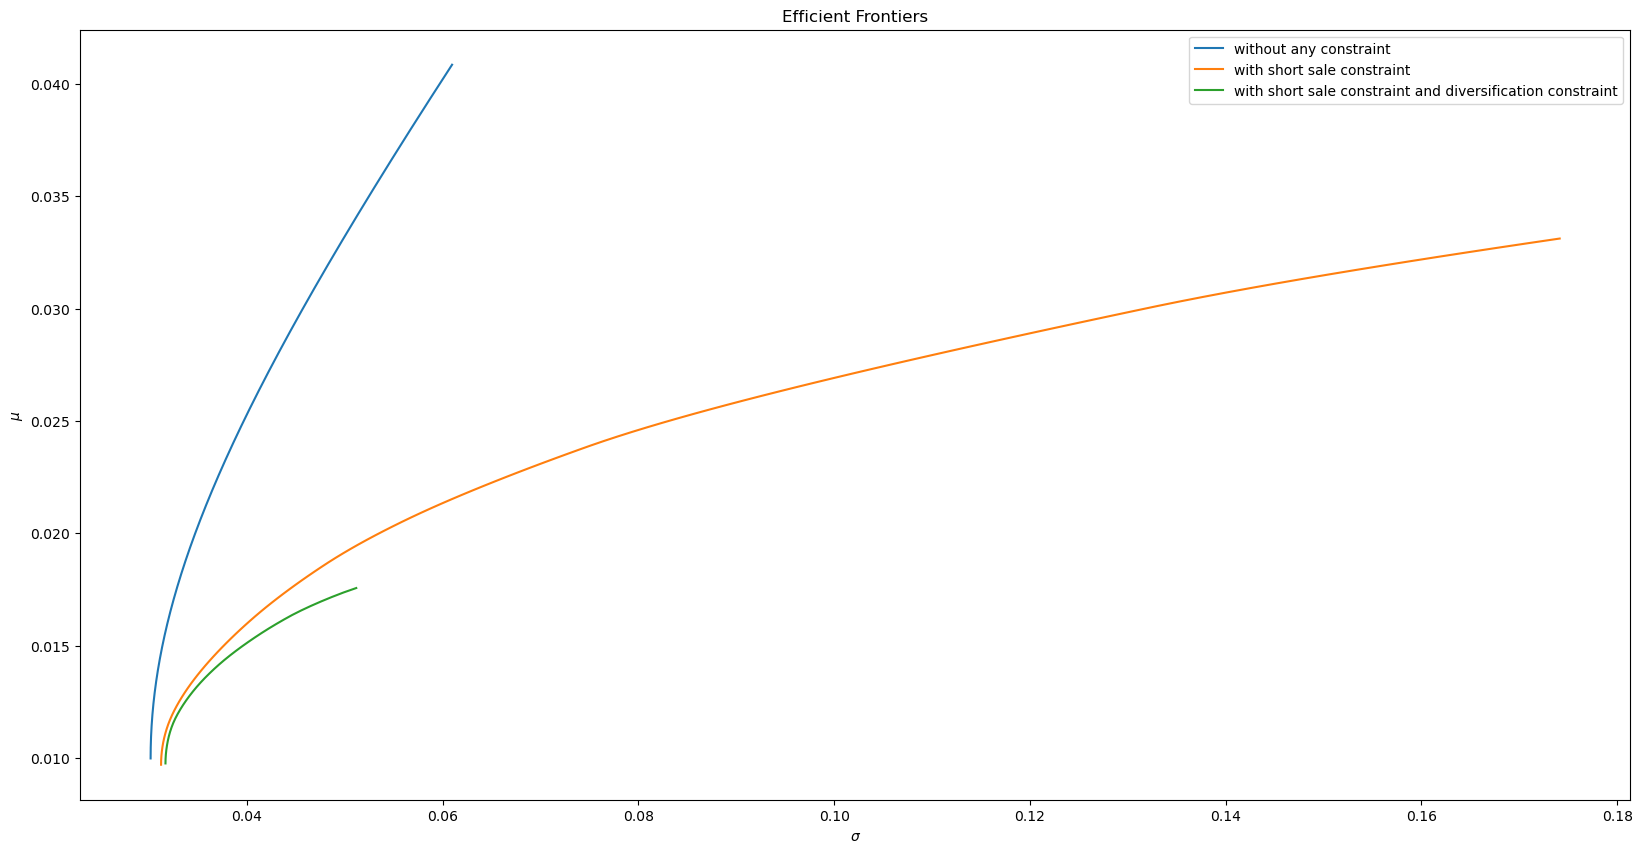

In [946]:
plt.figure(figsize=(20,10))
plt.title("Efficient Frontiers")
plt.plot(sigma_list_1, mu_list_1, label="without any constraint")
plt.plot(sigma_list_2, mu_list_2, label="with short sale constraint")
plt.plot(sigma_list_3, mu_list_3, label="with short sale constraint and diversification constraint")
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.legend()
plt.show()

At the same target return, efficient portfolio with more constraints has bigger standard deviation than the others. The more constraints portfolio have, the riskier efficient portfolio becomes.

## Optitmal Portfolio

### 1. Draw the efficient frontier including the risk-free asset subject to:
$$
0 \leq \mathbf w \leq 0.1
$$

$Tangent \ portfolio$
$$
w_T = argmax \frac{\mathbf w' \mathbf \mu}{\sqrt{\mathbf w' \Sigma \mathbf w}}
$$
$$
subject \ to
$$
$$
\mathbf e'\mathbf w = 1
$$
$$
0 \leq w_i \leq 0.1 \ for \ i = 1,...,30
$$

where $\mathbf w = [w_1 \ w_2 \ ... \ w_{30}]' $ is a weight vector of risky assets and $\mathbf e = [ 1 \space 1\space 1\space... 1\space]'$


In [947]:
# Objective function
def fobj(w, mu, C):
    return -(w @ mu) /  np.sqrt(w.T @ C @ w)

# Budget constraint (equality)
def fcon_budget(w):
     return w.sum() - 1 # = 0

# Bounds
bounds = sp.optimize.Bounds(0 * e, 0.1 * e)

cons = [dict(type='eq', fun=fcon_budget)]

# Initial guess
w0 = e / len(e)
res = sp.optimize.minimize(fobj, w0, args=(mu.values, Sigma.values), bounds=bounds, constraints=cons, options={'maxiter':5000})
print(res)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.38144012100559205
       x: [ 0.000e+00  1.707e-16 ...  5.409e-02  1.000e-01]
     nit: 11
     jac: [ 1.706e-01  1.417e-01 ...  3.876e-02 -1.081e-01]
    nfev: 342
    njev: 11


In [948]:
# Tangent portfolio
w_T = res.x

In [949]:
# Check if w_T satisfies the constraints
print('Sum of w_T:', np.sum(w_T))
print('Max of w_T:', np.max(w_T))
print('Min of w_T:', np.min(w_T))

mu_T = w_T @ mu.values
sigma_T = np.sqrt(w_T @ Sigma.values @ w_T)

Sum of w_T: 1.0000000000000002
Max of w_T: 0.1
Min of w_T: 0.0


In [950]:
mu_T

0.014178787911791644

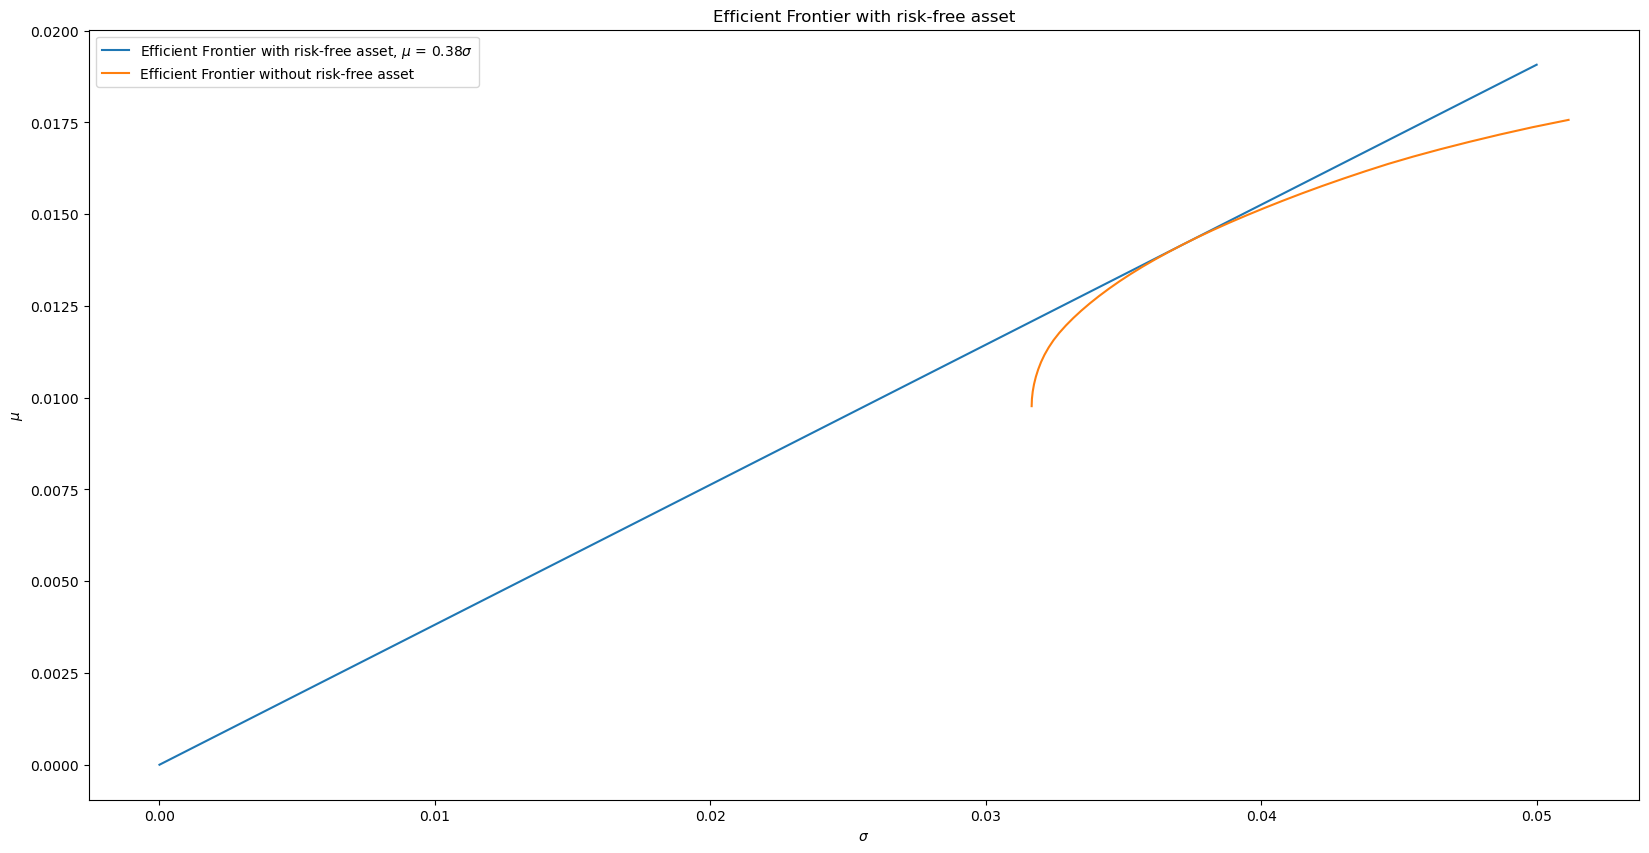

In [951]:
# Get linear equation which passes through the origin and the tangent portfolio
x1, y1 = 0, 0
x2, y2 = sigma_T, mu_T
m = (y2 - y1) / (x2 - x1)
x_range = np.linspace(0, 0.05, 1000)
y_values = [m * x for x in x_range]

# Draw the line
plt.figure(figsize=(20,10))
plt.title("Efficient Frontier with risk-free asset")
plt.plot(x_range, y_values, label=f'Efficient Frontier with risk-free asset, $\mu$ = {m:.2f}$\sigma$')
plt.plot(sigma_list_3, mu_list_3, label=f'Efficient Frontier without risk-free asset')
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.legend()
plt.show()

### 2. Find an optimal portfolio that satisfies the following:
- Maximize the expected return.
- Weights on the risky assets should be non-negative (no short-sale).
- The weight on any risky asset cannot exceed 10%.
- The probability that the portfolio return being positive should be at
least 60%.

Stage 1. Tangent Portfolio

-Find the tangent portfolio that satisfies the short sale and the diversification constraints.

$$
w_T = argmax \frac{\mathbf w' \mathbf \mu}{\sqrt{\mathbf w' \Sigma \mathbf w}}
$$
$$
subject \ to
$$
$$
\mathbf e'\mathbf w = 1
$$
$$
0 \leq w_i \leq 0.1 \ for \ i = 1,...,30
$$

where $\mathbf w = [w_1 \ w_2 \ ... \ w_{30}]' $ is a weight vector of risky assets and $\mathbf e = [ 1 \space 1\space 1\space... 1\space]'$

Stage 2. Allocation to Risk-Free Asset

-Determine allocation between the tangent portfolio and a risk-fress asset so that the shortfall constranint is satisfied.

$Shortfall \ Risk$

$$
P(r_p > 0) \geq 0.6
$$

$$
\mu_p \geq \Phi^{-1}(0.6)\sigma_p
$$
$$
W_T\mu_T \geq \Phi^{-1}(0.6)W_T\sigma_T
$$
$$
W_T (\mu_T - \Phi^{-1}(0.6)\sigma_T) \geq 0
$$

$\Phi$ denotes standard normal CDF
where $\ W_T $ is weight on the tangent portfolio and $1-W_T$ is weight on the risk-free asset.

In [952]:
mu_T-sp.stats.norm.ppf(0.6)*sigma_T

0.0047614386461735

$$ 0 \leq W_T \leq 1 $$
In this constraint, weight which maximizes expected return is weight of the tagent portfolio itself
$$ W_T = 1 $$

### 3. Mark the optimal portfolio on the efficient frontier.

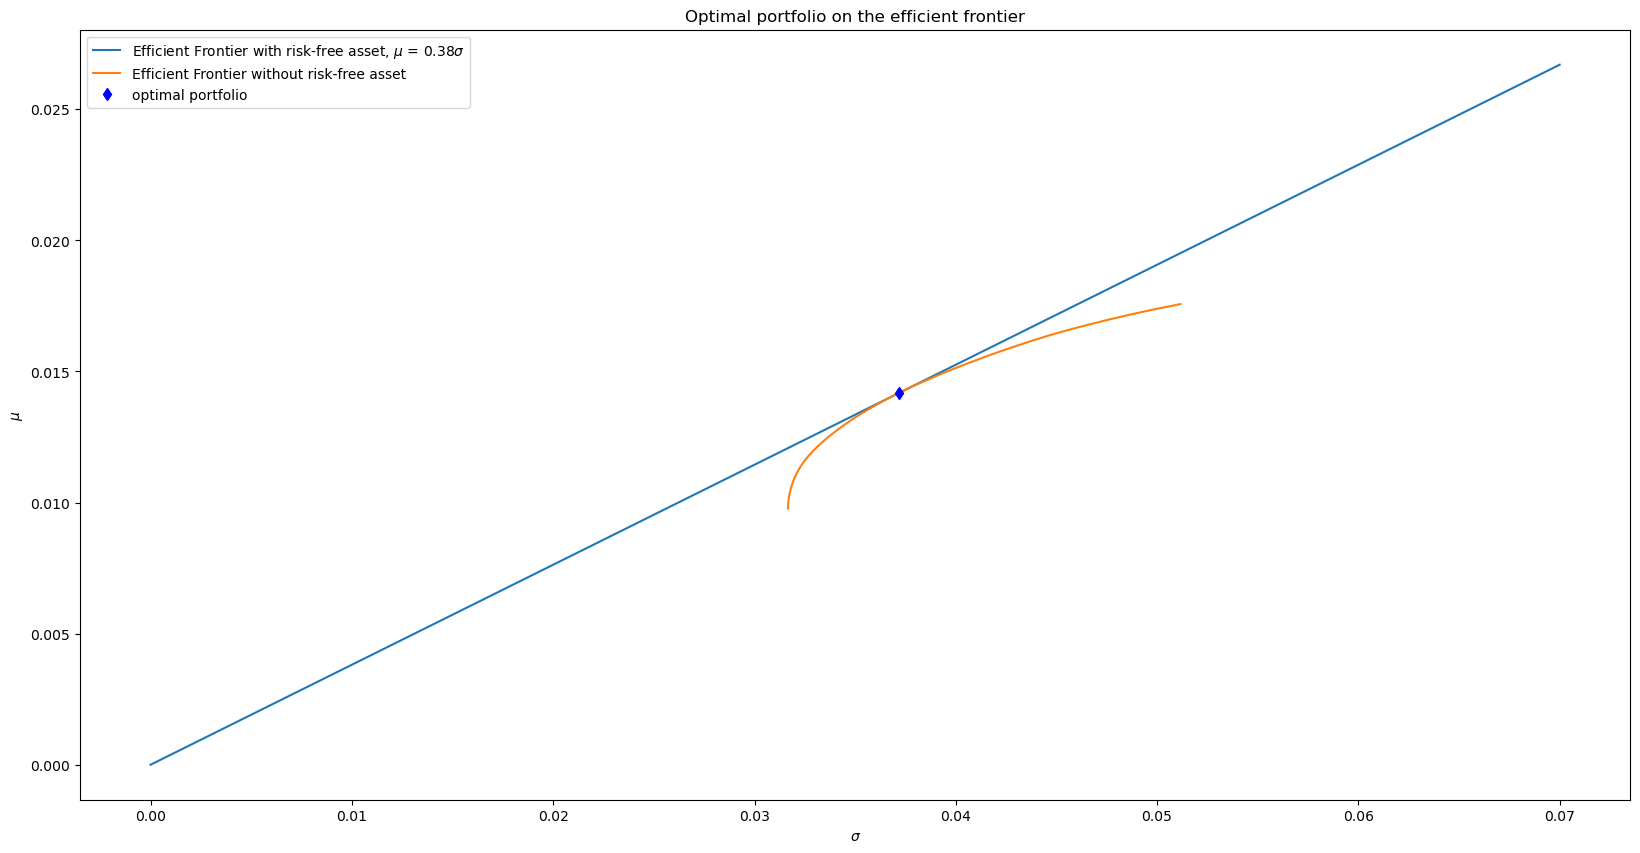

In [953]:
# linear equation pass through origin and tangent portfolio
x1, y1 = 0, 0
x2, y2 = sigma_T, mu_T
m = (y2 - y1) / (x2 - x1)
x_range = np.linspace(0, 0.07, 1000)
y_values = [m * x for x in x_range]

# Draw the line
plt.figure(figsize=(20,10))
plt.title("Optimal portfolio on the efficient frontier")
plt.plot(x_range, y_values, label=f'Efficient Frontier with risk-free asset, $\mu$ = {m:.2f}$\sigma$')
plt.plot(sigma_list_3, mu_list_3, label=f'Efficient Frontier without risk-free asset')
plt.plot([sigma_T], [mu_T], 'bd', label="optimal portfolio")
plt.xlabel('$\sigma$')
plt.ylabel('$\mu$')
plt.legend()
plt.show()

### 4. Evaluate the optimal portfolio over the period from 2021.01 to 2022.12. Report the annualized mean return, annualized standard deviation, annualized Sharpe ratio, and cumulative return.

In [954]:
stock_data_2021_01_to_2022_12 = stock_data["2021-01":"2022-12"]
stock_data_2021_01_to_2022_12

permno,10104,10107,11308,11850,13856,14541,14593,17778,18163,20482,...,62092,65875,66181,76076,83443,84398,84788,86580,87055,92655
date,,,,,,,,,,,,,,,,,,,,,
2021-01-29,-0.062143,0.042892,-0.121991,0.087821,-0.079096,0.008881,-0.005502,-0.010681,-0.072871,0.132889,...,0.094293,-0.057404,0.019577,0.004246,-0.017251,-0.010190,-0.015576,-0.004998,-0.064627,-0.048762
2021-02-26,0.067516,0.004225,0.017445,0.231936,-0.054038,0.188850,-0.079532,0.059518,-0.036503,-0.030828,...,-0.116971,0.010046,-0.046082,0.006505,0.055470,0.027805,-0.035328,0.055794,-0.058820,-0.004077
2021-03-31,0.087738,0.014588,0.084507,0.026853,0.102814,0.047900,0.007340,0.057935,0.096333,0.000501,...,0.014575,0.051537,0.187969,0.152440,0.062201,0.045346,0.000372,-0.026414,0.064894,0.123713
2021-04-30,0.084652,0.069602,0.024094,0.025255,0.019159,-0.016414,0.076218,0.069479,-0.008419,0.005758,...,0.030348,0.004600,0.060344,-0.008316,0.076252,0.052910,0.120663,0.124455,0.057876,0.071841
2021-05-28,0.038923,-0.007693,0.024268,0.034941,0.026221,0.019986,-0.050434,0.056970,0.010718,-0.028564,...,-0.001552,-0.022495,-0.014706,0.039089,0.052700,0.006566,-0.070470,0.082281,0.016609,0.032899
2021-06-30,-0.011430,0.084989,-0.013746,0.080692,0.008821,0.009153,0.099109,-0.039906,0.000593,-0.006172,...,0.075037,-0.008143,0.005111,0.001890,-0.039801,0.022369,0.067355,0.231586,0.045999,-0.024349
2021-07-30,0.123587,0.051717,0.053964,-0.087349,0.059256,-0.027974,0.064982,0.000714,0.060548,0.047442,...,0.070450,0.006737,0.029164,0.051698,0.001331,0.024412,-0.032722,-0.025172,0.088053,0.029418
2021-08-31,0.022837,0.061528,-0.012625,-0.037867,-0.003568,-0.036342,0.042438,0.026259,0.001125,0.044553,...,0.027666,-0.013983,-0.006125,0.065920,0.026878,0.029760,0.043034,0.148213,0.059969,0.009825
2021-09-30,-0.022439,-0.066119,-0.060735,0.078870,-0.031364,0.048362,-0.068037,-0.043082,-0.018189,-0.065205,...,0.029985,-0.018000,0.011435,-0.077770,-0.044896,-0.046487,-0.053518,-0.074559,-0.013480,-0.057847


In [955]:
# Generate new column which indicates portfolio return at that time
stock_data_2021_01_to_2022_12['pf_return'] = stock_data_2021_01_to_2022_12.apply(lambda returns: returns @ w_T, axis=1)

# Generate new column which indicates culmulative portfolio return at that time
stock_data_2021_01_to_2022_12['culmulative_return'] = stock_data_2021_01_to_2022_12['pf_return'].cumsum()

/var/folders/yl/ctrp4vjd3zn407qhh_nft51h0000gn/T/ipykernel_41362/3574809108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_2021_01_to_2022_12['pf_return'] = stock_data_2021_01_to_2022_12.apply(lambda returns: returns @ w_T, axis=1)
/var/folders/yl/ctrp4vjd3zn407qhh_nft51h0000gn/T/ipykernel_41362/3574809108.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data_2021_01_to_2022_12['culmulative_return'] = stock_data_2021_01_to_2022_12['pf_return'].cumsum()


In [956]:
stock_data_2021_01_to_2022_12

permno,10104,10107,11308,11850,13856,14541,14593,17778,18163,20482,...,66181,76076,83443,84398,84788,86580,87055,92655,pf_return,culmulative_return
date,,,,,,,,,,,,,,,,,,,,,
2021-01-29,-0.062143,0.042892,-0.121991,0.087821,-0.079096,0.008881,-0.005502,-0.010681,-0.072871,0.132889,...,0.019577,0.004246,-0.017251,-0.010190,-0.015576,-0.004998,-0.064627,-0.048762,0.025246,0.025246
2021-02-26,0.067516,0.004225,0.017445,0.231936,-0.054038,0.188850,-0.079532,0.059518,-0.036503,-0.030828,...,-0.046082,0.006505,0.055470,0.027805,-0.035328,0.055794,-0.058820,-0.004077,-0.029858,-0.004612
2021-03-31,0.087738,0.014588,0.084507,0.026853,0.102814,0.047900,0.007340,0.057935,0.096333,0.000501,...,0.187969,0.152440,0.062201,0.045346,0.000372,-0.026414,0.064894,0.123713,0.038363,0.033751
2021-04-30,0.084652,0.069602,0.024094,0.025255,0.019159,-0.016414,0.076218,0.069479,-0.008419,0.005758,...,0.060344,-0.008316,0.076252,0.052910,0.120663,0.124455,0.057876,0.071841,0.041035,0.074785
2021-05-28,0.038923,-0.007693,0.024268,0.034941,0.026221,0.019986,-0.050434,0.056970,0.010718,-0.028564,...,-0.014706,0.039089,0.052700,0.006566,-0.070470,0.082281,0.016609,0.032899,0.012939,0.087724
2021-06-30,-0.011430,0.084989,-0.013746,0.080692,0.008821,0.009153,0.099109,-0.039906,0.000593,-0.006172,...,0.005111,0.001890,-0.039801,0.022369,0.067355,0.231586,0.045999,-0.024349,0.042112,0.129836
2021-07-30,0.123587,0.051717,0.053964,-0.087349,0.059256,-0.027974,0.064982,0.000714,0.060548,0.047442,...,0.029164,0.051698,0.001331,0.024412,-0.032722,-0.025172,0.088053,0.029418,0.050166,0.180002
2021-08-31,0.022837,0.061528,-0.012625,-0.037867,-0.003568,-0.036342,0.042438,0.026259,0.001125,0.044553,...,-0.006125,0.065920,0.026878,0.029760,0.043034,0.148213,0.059969,0.009825,0.038893,0.218895
2021-09-30,-0.022439,-0.066119,-0.060735,0.078870,-0.031364,0.048362,-0.068037,-0.043082,-0.018189,-0.065205,...,0.011435,-0.077770,-0.044896,-0.046487,-0.053518,-0.074559,-0.013480,-0.057847,-0.044211,0.174684


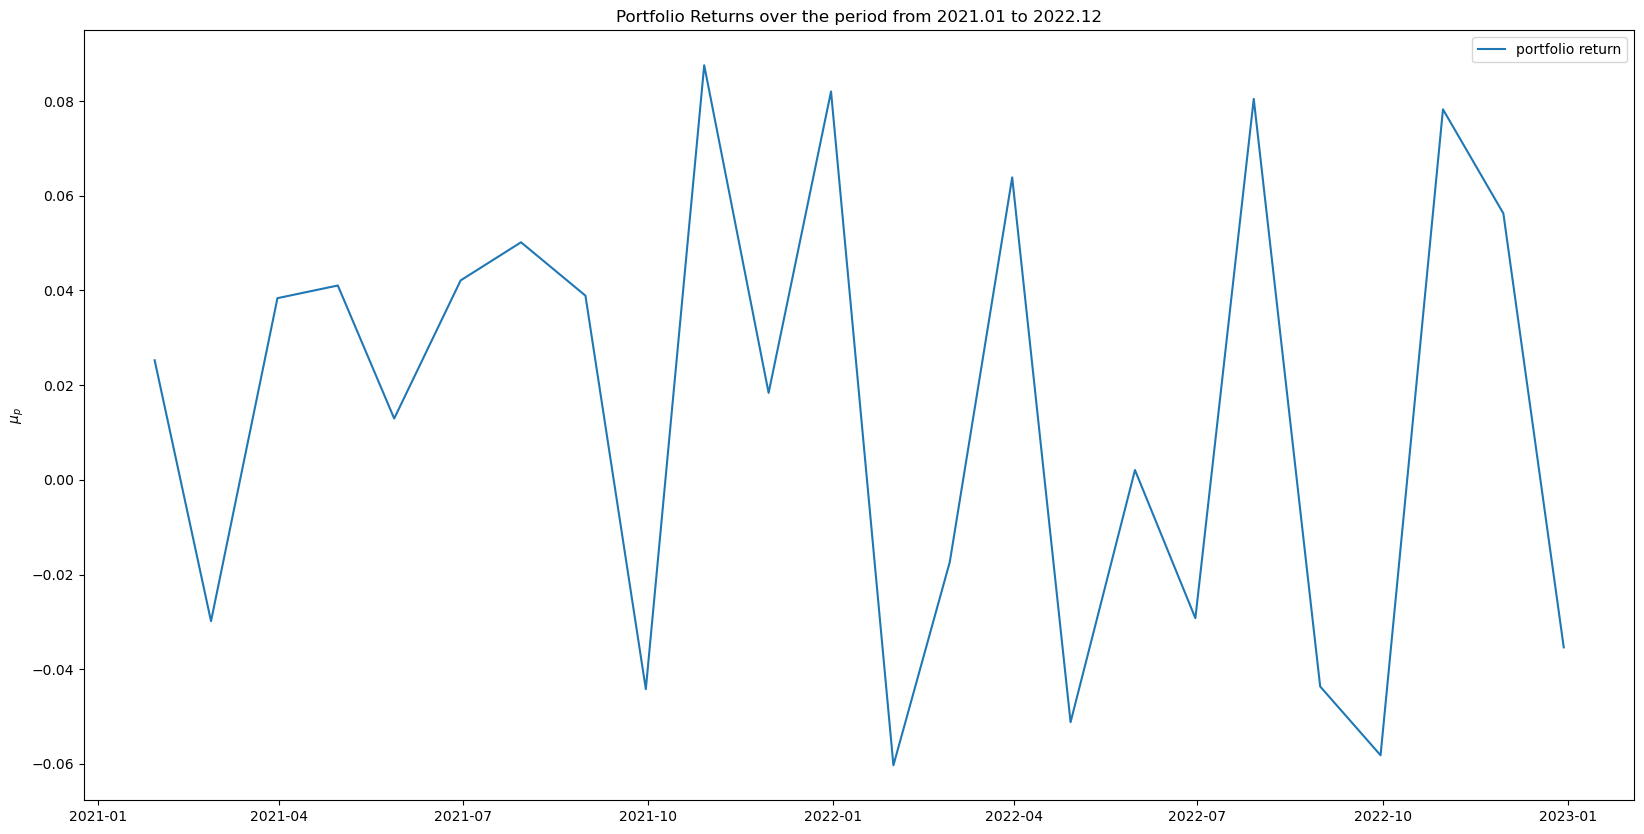

In [957]:
plt.figure(figsize=(20,10))
plt.title("Portfolio Returns over the period from 2021.01 to 2022.12")
plt.ylabel('$\mu_p$')
plt.plot(stock_data_2021_01_to_2022_12.index, stock_data_2021_01_to_2022_12["pf_return"], label="portfolio return")
plt.legend()
plt.show()

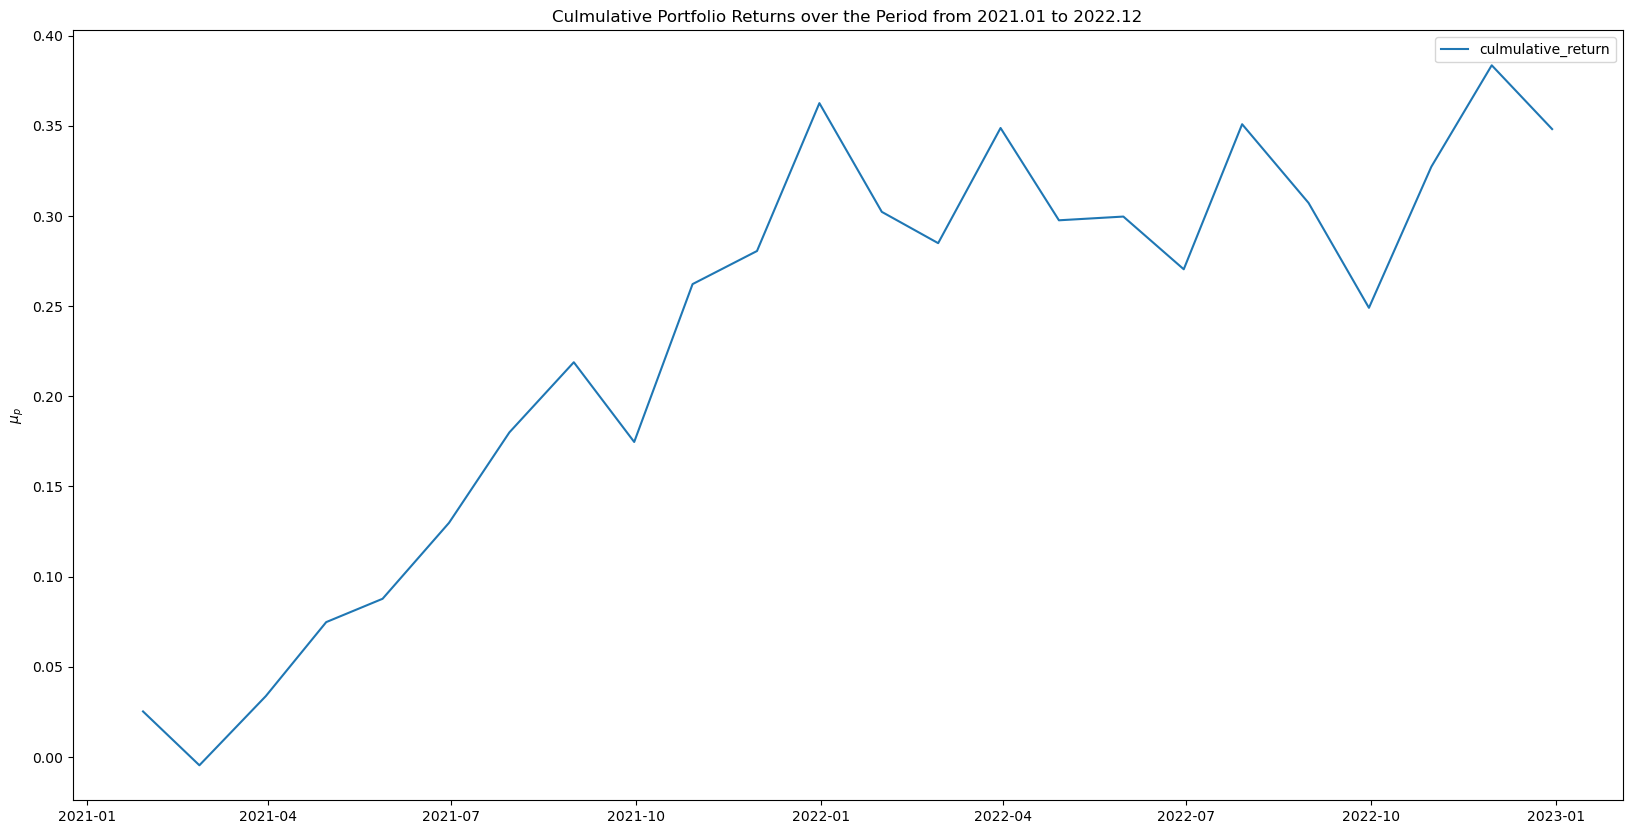

In [958]:
plt.figure(figsize=(20,10))
plt.title("Culmulative Portfolio Returns over the Period from 2021.01 to 2022.12")
plt.ylabel('$\mu_p$')
plt.plot(stock_data_2021_01_to_2022_12.index, stock_data_2021_01_to_2022_12['culmulative_return'], label="culmulative_return")
plt.legend()
plt.show()

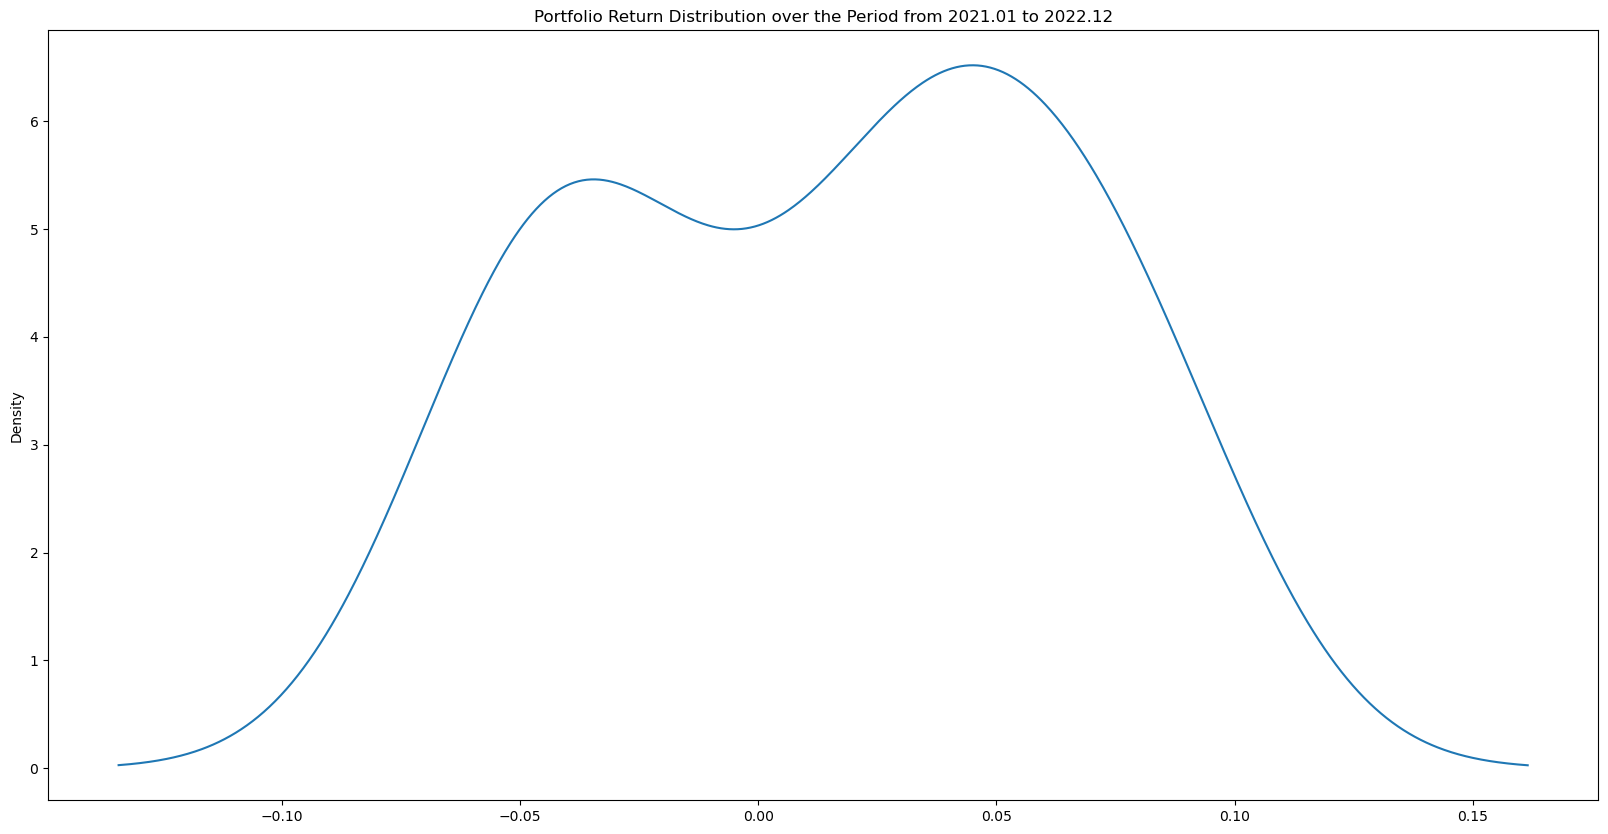

In [959]:
plt.figure(figsize=(20,10))
plt.title("Portfolio Return Distribution over the Period from 2021.01 to 2022.12")
stock_data_2021_01_to_2022_12["pf_return"].plot(kind='kde') # kernal density plot
plt.show()

In [960]:
annualized_mean_return = stock_data_2021_01_to_2022_12['pf_return'].mean() * 12
annualized_std = stock_data_2021_01_to_2022_12['pf_return'].std() * np.sqrt(12)
annualized_sharpe_ratio = annualized_mean_return / annualized_std
# get the latest data of culmulative return
culmulative_return = stock_data_2021_01_to_2022_12["culmulative_return"][-1]

In [961]:
print("Annualized mean return is", annualized_mean_return)
print("Annualized standard deviation is", annualized_std)
print("Annualized sharpe ratio is",annualized_sharpe_ratio)
print("Culmulative return is", culmulative_return)

Annualized mean return is 0.1741004822531595
Annualized standard deviation is 0.17105123295251973
Annualized sharpe ratio is 1.0178265262869293
Culmulative return is 0.348200964506319


## Reference
황수성 & 신진호.(2023).재무경제학(2nd ed.).정독.
